In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\One\Git\COURSERA YANDEX\Course 4\week 17\ab_test_analysis\ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


# Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

In [3]:
round(((data['n_clicks'][data['slot'] == 'exp'].sum() - data['n_clicks'][data['slot'] == 'control'].sum()) / data['n_clicks'][data['slot'] == 'control'].sum())*100, 3)

1.614

# Постройте с помощью бутстрепа 95% доверительный интервал для средних значений и разности медиан количества кликов в каждой из двух групп. 

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [45]:
bootstrapped_exp = get_bootstrap_samples(data['n_clicks'][data['slot'] == 'exp'].values, 500)
bootstrapped_control = get_bootstrap_samples(data['n_clicks'][data['slot'] == 'control'].values, 500)

In [46]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [47]:
medians_delta = np.median(bootstrapped_exp, axis=1) - np.median(bootstrapped_control, axis=1)
stat_intervals(medians_delta, 0.05)

array([1., 1.])

In [48]:
averages_delta = np.mean(bootstrapped_exp, axis=1) - np.mean(bootstrapped_control, axis=1)
stat_intervals(averages_delta, 0.05)

array([0.19960335, 0.40496719])

# Посмотрите на выданные вам данные и выберите все верные варианты ответа относительно проверки гипотезы о равенстве среднего количества кликов в группах.

In [49]:
from scipy.stats import ttest_ind
ttest_ind(data['n_clicks'][data['slot'] == 'exp'], data['n_clicks'][data['slot'] == 'control'])

Ttest_indResult(statistic=5.630626716976624, pvalue=1.7964064239169323e-08)

# t-критерий Стьюдента имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.

In [50]:
bootstrap_means = np.mean(bootstrapped_control, axis=1)
control_boot_chi_squared = []

In [51]:
%%time

for k in range(bootstrapped_control.shape[0]):
    summer = 0
    for i in range(bootstrapped_control.shape[1]):
        summer += (bootstrapped_control[k][i] - bootstrap_means[k])**2
    control_boot_chi_squared.append(summer)

Wall time: 13min 27s


In [52]:
len(control_boot_chi_squared)

500

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

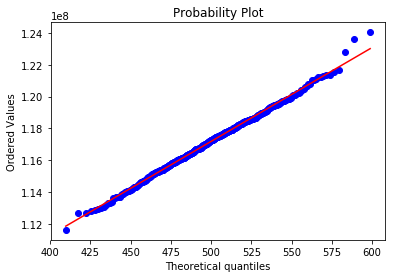

In [56]:
np.random.seed(0)
n = len(control_boot_chi_squared)
from scipy.stats import probplot
probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(n-1), plot=plt)

((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

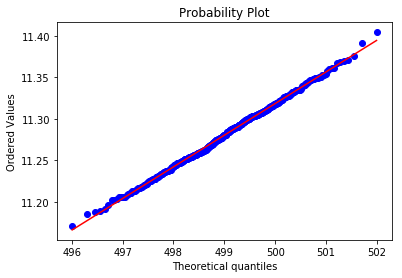

In [57]:
probplot(bootstrap_means, dist="norm", 
                     sparams=(n-1), plot=plt)

# Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. 

In [58]:
from scipy.stats import mannwhitneyu

In [59]:
exp_data = data[data['slot'] == 'exp']
control_data = data[data['slot'] == 'control']

In [77]:
exp_data_clicks = exp_data.groupby('userID')['n_clicks'].sum()
control_data_clicks = control_data.groupby('userID')['n_clicks'].sum()

In [80]:
exp_data['userID'].nunique(), control_data['userID'].nunique()

(281450, 284392)

In [85]:
mannwhitneyu(exp_data_clicks.values, control_data_clicks.values)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

# Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

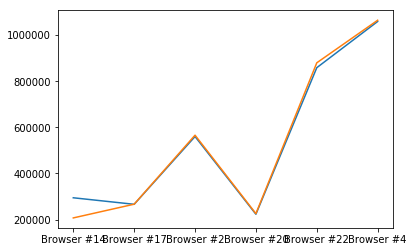

In [101]:
plt.plot(exp_data.groupby('browser')['n_clicks'].sum())
plt.plot(control_data.groupby('browser')['n_clicks'].sum())

In [111]:
list_of_p = []
for element in list(exp_data.browser.unique()):
    list_of_p.append(mannwhitneyu(exp_data[exp_data['browser'] == element]['n_clicks'].values, 
                                  control_data[control_data['browser'] == element]['n_clicks'].values).pvalue)

In [112]:
list_of_p

[0.0272438604197241,
 0.40760617658454984,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032]

In [ ]:
mannwhitneyu(exp_data_clicks.values, control_data_clicks.values)

In [117]:
from statsmodels.stats.multitest import multipletests
6 - multipletests(list_of_p, method='holm')[0].sum()

5

# Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

In [121]:
CDQuer = control_data.groupby('browser')[['n_nonclk_queries', 'n_queries']].sum()

In [122]:
EDQuer = exp_data.groupby('browser')[['n_nonclk_queries', 'n_queries']].sum()

In [123]:
CDQuer['rel'] = CDQuer['n_nonclk_queries'] / CDQuer['n_queries']
EDQuer['rel'] = EDQuer['n_nonclk_queries'] / EDQuer['n_queries']

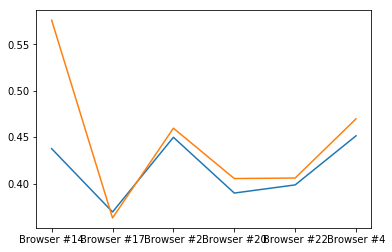

In [127]:
plt.plot(EDQuer['rel'])
plt.plot(CDQuer['rel'])